In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
!unrar x kaggle_simpson_testset.rar


UNRAR 5.61 beta 1 freeware      Copyright (c) 1993-2018 Alexander Roshal


Extracting from kaggle_simpson_testset.rar

Creating    kaggle_simpson_testset                                    OK
Creating    kaggle_simpson_testset/bart_simpson                       OK
Extracting  kaggle_simpson_testset/bart_simpson/bart_simpson_0.jpg         0%  OK 
Extracting  kaggle_simpson_testset/bart_simpson/bart_simpson_1.jpg         0%  OK 
Extracting  kaggle_simpson_testset/bart_simpson/bart_simpson_10.jpg        0%  OK 
Extracting  kaggle_simpson_testset/bart_simpson/bart_simpson_11.jpg        0%  OK 
Extracting  kaggle_simpson_testset/bart_simpson/bart_simpson_12.jpg        0%  OK 
Extracting  kaggle_simpson_testset/bart_simpson/bart_simpson_13.jpg        1%  OK 
Extracting  kaggle_simpson_testset/bart_simpson/bart_simpson_14.jpg        1%  OK 
Extracting  kaggle_simpson_testset/bart_simpson/bart_simpson_15.jpg        1%  OK

In [ ]:
!unrar x simpsons_dataset.rar

Streaming output truncated to the last 5000 lines.
Extracting  simpsons_dataset/milhouse_van_houten/pic_0184.jpg             64%  OK 
Extracting  simpsons_dataset/milhouse_van_houten/pic_0185.jpg             64%  OK 
Extracting  simpsons_dataset/milhouse_van_houten/pic_0186.jpg             64%  OK 
Extracting  simpsons_dataset/milhouse_van_houten/pic_0187.jpg             64%  OK 
Extracting  simpsons_dataset/milhouse_van_houten/pic_0188.jpg             64%  OK 
Extracting  simpsons_dataset/milhouse_van_houten/pic_0189.jpg             64%  OK 
Extracting  simpsons_dataset/milhouse_van_houten/pic_0190.jpg             64%  OK 
Extracting  simpsons_dataset/milhouse_van_houten/pic_0191.jpg             64%  OK 
Extracting  simpsons_dataset/milhouse_van_houten/pic_0192.jpg             64%  OK 
Extracting  simpsons_dataset/milhouse_van_houten/pic_0193.jpg             64%  OK 
Extracting  simpsons_dataset/

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Activation, Dense, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model


from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import glob
import matplotlib.pyplot as plt 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
%matplotlib inline

In [ ]:
data_path = '/content/simpsons_dataset'

In [7]:
test_path = '/content/kaggle_simpson_testset'

In [ ]:
train_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input,validation_split=0.1).flow_from_directory(
    directory=data_path, target_size=(224,224), batch_size=10,subset='training')
valid_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input,validation_split=0.1).flow_from_directory(
    directory=data_path, target_size=(224,224), batch_size=10,subset='validation')

Found 12434 images belonging to 10 classes.
Found 1377 images belonging to 10 classes.
Found 496 images belonging to 10 classes.


In [8]:
test_batches = ImageDataGenerator(preprocessing_function = tf.keras.applications.mobilenet.preprocess_input).flow_from_directory(
    directory=test_path, target_size=(224,224), batch_size=10, shuffle=False)


Found 496 images belonging to 10 classes.


In [ ]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [ ]:
mobile.summary()

Model: "mobilenet_1.00_224"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                         

In [ ]:
x = mobile.layers[-6].output
x = GlobalAveragePooling2D()(x)

In [ ]:
output = Dense(units=10, activation='softmax')(x) 

In [ ]:
model = Model(inputs=mobile.input, outputs=output)

In [ ]:
for layer in model.layers[:-23]:
  layer.trainable = False

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 conv1 (Conv2D)              (None, 112, 112, 32)      864       
                                                                 
 conv1_bn (BatchNormalizatio  (None, 112, 112, 32)     128       
 n)                                                              
                                                                 
 conv1_relu (ReLU)           (None, 112, 112, 32)      0         
                                                                 
 conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)     288       
                                                                 
 conv_dw_1_bn (BatchNormaliz  (None, 112, 112, 32)     128       
 ation)                                                      

##Testing

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(x=train_batches, validation_data=valid_batches, epochs=10, verbose=2)

Epoch 1/10
1244/1244 - 71s - loss: 0.4596 - accuracy: 0.8636 - val_loss: 0.3038 - val_accuracy: 0.9208 - 71s/epoch - 57ms/step
Epoch 2/10
1244/1244 - 61s - loss: 0.1223 - accuracy: 0.9688 - val_loss: 0.2389 - val_accuracy: 0.9346 - 61s/epoch - 49ms/step
Epoch 3/10
1244/1244 - 55s - loss: 0.0626 - accuracy: 0.9842 - val_loss: 0.2640 - val_accuracy: 0.9187 - 55s/epoch - 44ms/step
Epoch 4/10
1244/1244 - 56s - loss: 0.0400 - accuracy: 0.9912 - val_loss: 0.2338 - val_accuracy: 0.9375 - 56s/epoch - 45ms/step
Epoch 5/10
1244/1244 - 56s - loss: 0.0248 - accuracy: 0.9941 - val_loss: 0.2797 - val_accuracy: 0.9325 - 56s/epoch - 45ms/step
Epoch 6/10
1244/1244 - 57s - loss: 0.0231 - accuracy: 0.9938 - val_loss: 0.2533 - val_accuracy: 0.9368 - 57s/epoch - 46ms/step
Epoch 7/10
1244/1244 - 56s - loss: 0.0167 - accuracy: 0.9957 - val_loss: 0.3256 - val_accuracy: 0.9237 - 56s/epoch - 45ms/step
Epoch 8/10
1244/1244 - 56s - loss: 0.0184 - accuracy: 0.9956 - val_loss: 0.2900 - val_accuracy: 0.9281 - 56s/ep

##Testing

In [9]:
test_labels = test_batches.classes

In [ ]:
predictions = model.predict(x=test_batches, verbose=0)

In [11]:
test_batches.class_indices

{'bart_simpson': 0,
 'charles_montgomery_burns': 1,
 'homer_simpson': 2,
 'krusty_the_clown': 3,
 'lisa_simpson': 4,
 'marge_simpson': 5,
 'milhouse_van_houten': 6,
 'moe_szyslak': 7,
 'ned_flanders': 8,
 'principal_skinner': 9}

In [13]:
def plot_confusion_matrix(cm, classes,
                            normalize = False,
                            title= 'Confusion matrix',
                            cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize :
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] 
        print("Normalized confusion matrix")
    else:
        print('confusion matrix without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i,j],
          horizontalalignment = "center",
          color = "white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [14]:
cm = confusion_matrix(y_true=test_labels, y_pred=predictions.argmax(axis=1))

confusion matrix without normalization
[[49  1  0  0  0  0  0  0  0  0]
 [ 0 48  0  0  0  0  0  0  0  0]
 [ 0  0 50  0  0  0  0  0  0  0]
 [ 0  0  0 50  0  0  0  0  0  0]
 [ 0  1  0  0 49  0  0  0  0  0]
 [ 0  0  0  0  0 49  0  0  0  1]
 [ 0  0  1  0  0  0 48  0  0  0]
 [ 0  4  0  0  0  0  0 46  0  0]
 [ 0  1  1  0  0  0  0  0 47  0]
 [ 0  1  0  0  0  0  0  0  0 49]]


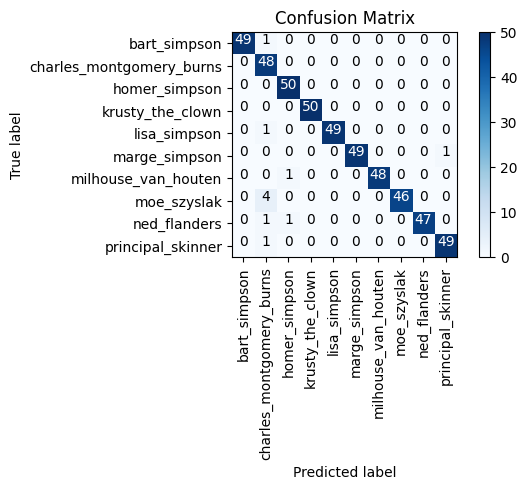

In [15]:
cm_plot_labels = ['bart_simpson','charles_montgomery_burns','homer_simpson','krusty_the_clown','lisa_simpson','marge_simpson','milhouse_van_houten','moe_szyslak','ned_flanders','principal_skinner']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

##Saving

In [ ]:
model.save('/content/drive/MyDrive/ML_models/2_simpsons_identifier_TL.h5')